## Диагностика и кривые обучения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### 1.	Загрузите датасет breast_cancer.

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### 2.	Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [4]:
X_2d = X[:, :2]

### 3.	Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2)

### 4.	Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [6]:
C = 0.01
m = SVC(C=C, kernel="rbf")
m.fit(X_train, y_train)

SVC(C=0.01)

In [7]:
m1_test = m.score(X_test, y_test)
m1_train = m.score(X_train, y_train)
print(f"Train = {m1_train}")
print(f"Test = {m1_test}")

Train = 0.676923076923077
Test = 0.6403508771929824


Точность на обучаемой выборке состваляет 70%, на тестовой 65%, возможно модель недообучается

### 5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели

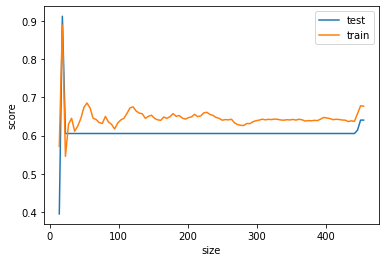

In [8]:
test_scores = []
train_scores = []

koeff = 100
data = np.linspace(len(X_train)//koeff+10, len(X_train), koeff)

for i in data:
    
    clf = SVC(C=0.01, kernel='rbf')
    x_ = X_train[:int(i)]
    y_ = y_train[:int(i)]

    clf.fit(x_, y_)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(x_, y_))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('size')
ax.set_ylabel('score')
ax.legend()

Метрики train_score и test_score с ростом объема выборки к концу графика увеличиваются, значит мы не достигли переобучения. Пока мы не доситгли переобучения, то можно ее еще дообучить.

Из предложенных вариантов самыми очевидным являются следующие
1. увеличить регуляризацию модели (аргумент С)
2. попробовать другие, более сложные модели

Также можно в теории увеличить выборку каким-либо способом, но на данном этапе это не представляется возможным


###  6.	Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

##### Использование метода опорных векторов через LinearSVC

In [9]:
import sklearn.svm as svm

svect = svm.LinearSVC(max_iter=50000).fit(X_train, y_train)
m3_test = svect.score(X_test, y_test)
m3_train = svect.score(X_train, y_train)
print(f"Train = {m3_train}")
print(f"Test = {m3_test}")

print(f"\nTrain = +{(m3_train - m1_train) * 100}")
print(f"Test = +{(m3_test - m1_test) * 100}")

Train = 0.8857142857142857
Test = 0.8947368421052632

Train = +20.879120879120872
Test = +25.438596491228072


Использование альтернативных моделей может дать хороший прирост в точности предсказания модели. Метод опорных векторов дает прирост на 18%

##### Увеличение регуляризации

In [10]:
m = SVC(kernel='rbf', C=50)

m.fit(X_train, y_train)
m2_train = m.score(X_train, y_train)
m2_test = m.score(X_test, y_test)

print(f"Train = {m2_train}")
print(f"Test = {m2_test}")

print(f"\nTrain = +{(m2_train - m1_train) * 100}")
print(f"Test = +{(m2_test - m1_test) * 100}")

Train = 0.9010989010989011
Test = 0.9210526315789473

Train = +22.417582417582416
Test = +28.07017543859649


Как мы видим, увеличение регуляции положительно влияет на точность предстказания модели. При C=50 точность предсказания увеличивается на 21%

### 7.	Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

In [11]:
def plot_reg(linspace, kernel_name="rbf"):
    test_scores = []
    train_scores = []

    for i in linspace:
        clf = SVC(C=i, kernel=kernel_name)

        clf.fit(X_train, y_train)

        test_scores.append(clf.score(X_test, y_test))
        train_scores.append(clf.score(X_train, y_train))

    ax = plt.axes()
    ax.plot(linspace, test_scores, label="test", color="magenta")
    ax.plot(linspace, train_scores, label="train", color="red")
    ax.set_xlabel('С')
    ax.set_ylabel('score')
    ax.set_ylim([0.75, 1])
    ax.legend()
    return max(test_scores), max(train_scores)

0.9385964912280702

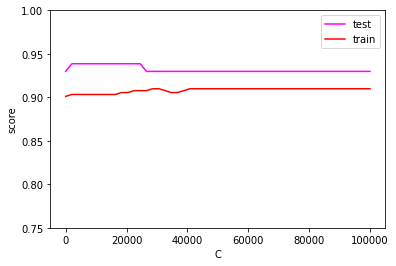

In [12]:
plot_reg(np.linspace(1, 100000, 50))[0]

### 8.	Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

0.9298245614035088

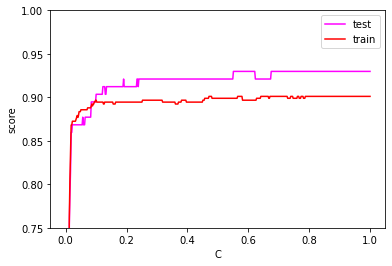

In [13]:
plot_reg(np.linspace(0.0001, 1, 500))[0]

Здесь модель себя ведет как по теории: с малым значением C модель недообучется, с большим - переобучается. Такой вывод модно сделать из графика: c увеличением аргумента точность модели на обучающих данных увеличивается, а на тестовых - уменьшается.

### 9.	Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

In [14]:
m3 = SVC(kernel='rbf', C=6)
m3.fit(X_train, y_train)

print(f"Train = {m3.score(X_train, y_train)}")
print(f"Test = { m3.score(X_test, y_test)}")

Train = 0.9032967032967033
Test = 0.9298245614035088


При C = 6 получаем 90% на тестовой выборке и 92% на тренировочной

### 10.	Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

0.9210526315789473

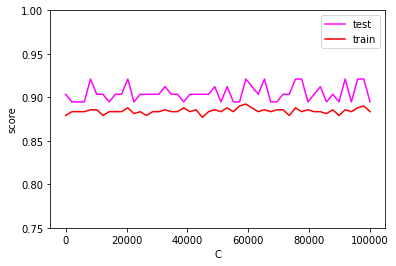

In [15]:
plot_reg(np.linspace(1, 100000, 50), "linear")[0]

Найти методом подбора оптимальное значение параметра регуляризации

In [16]:
clf = SVC(kernel='linear', C=8)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.9035087719298246
train accuracy: 0.8791208791208791


In [17]:
koeff = 600
m3 = SVC(kernel='rbf', C=koeff)
m4 = SVC(kernel='linear', C=koeff)
m3.fit(X_train, y_train)
m4.fit(X_train, y_train)

print(f"Train m3 = {m3.score(X_train, y_train)}")
print(f"Test m3 = { m3.score(X_test, y_test)}")
print(f"Train m4 = {m4.score(X_train, y_train)}")
print(f"Test m4 = { m4.score(X_test, y_test)}")

Train m3 = 0.9032967032967033
Test m3 = 0.9385964912280702
Train m4 = 0.8835164835164835
Test m4 = 0.9035087719298246


### Вывод
Модели похожи, но модель с ядром rbf на очень больших значениях коэффициента C показывает результаты лучше (ячейка выше)